In [1]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob
from tabulate import tabulate #to export in table format
import scipy.interpolate as interp

In [2]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

115


In [3]:
file = open("factors.txt")
lines = file.readlines()
file.close()

In [4]:
max_names = []
max_values = []

In [5]:

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    max_names.append(co[0])
    max_values.append(co[1])


In [6]:
#new_names = []

In [7]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [8]:
X = []

In [9]:
max_hist = []
new_names = []

In [10]:
histograma = []

In [11]:
for k in range(0,len(sn_names)):
    
    if sn_names[k][:-4] in max_names:
        
        idx = max_names.index(sn_names[k][:-4])
        #print(float(max_values[idx]))

        file = open(sn_names[k])
        lines = file.readlines()
        file.close()

        xtemp = []

        for line in lines:

            if line.startswith('#'): continue
            co=line.rstrip().replace('INDEF','Nan').split()

            xtemp.append(co[0])

        xtemp = np.array(xtemp, dtype=float)
        
        xtemp = xtemp*float(max_values[idx])

        #xtemp = xtemp/max(xtemp)

        if max(xtemp) < 10:

            max_hist.append(max(xtemp))
            new_names.append(sn_names[k])
            z = np.reshape(xtemp, (601, 61))

            zz = []
            xx = []
            yy = []

            for i in range(0,len(y)):

                for j in range(0,len(x)):
                    
                    zz.append(z[i][j])
                    xx.append(x[j])
                    yy.append(y[i])

                    if 15 - 0.5 < x[j] < 15 + 0.5:
                        
                        if 8200 - 1 < y[i] < 8200 + 1:
                            
                            if z[i][j] >0:
                                
                                histograma.append(z[i][j])
                    
                    
            X.append(np.array(zz))


In [12]:
max_hist

[0.95842972551,
 0.047304109135,
 0.39488387442,
 0.051811267644,
 0.16269031359,
 0.042495958557,
 0.14348048373299999,
 0.082198896456,
 0.6032969928,
 0.257739879264,
 0.191219366,
 0.29995194,
 0.04328469673200001,
 1.2922285145,
 0.053671369834999996,
 0.48974098449,
 0.032797669815,
 0.054046423916,
 0.123001745616,
 1.33773718137,
 0.67850533108,
 0.06868316839699999,
 0.159437188944,
 0.57045621962,
 0.5168854556,
 0.14764970726999999,
 0.107086159335,
 1.0951693067600001,
 1.11532636382,
 0.041259953987999996,
 0.227422019718,
 0.66388978067,
 0.136241717781,
 0.160828644384,
 0.05030677353,
 0.053184806927,
 0.121959814475,
 0.299306687732,
 0.17539770200399998,
 0.158005368855,
 1.9393417897699998,
 3.00875292,
 0.78100207614,
 0.66578754032,
 0.03099465144,
 1.90348908592,
 0.081045265848,
 2.3649096643000003,
 0.11257167771,
 0.044613298821,
 1.5357564009999998,
 0.26072250908,
 0.81790014575,
 4.771827852,
 0.077721199952,
 0.24095838232,
 0.046549579880999996,
 0.1857448

In [13]:
histograma1 = []

In [14]:
for i in range(0, len(histograma)):
    
    if histograma[i] < 0.03:
        
        histograma1.append(histograma[i])

<IPython.core.display.Javascript object>


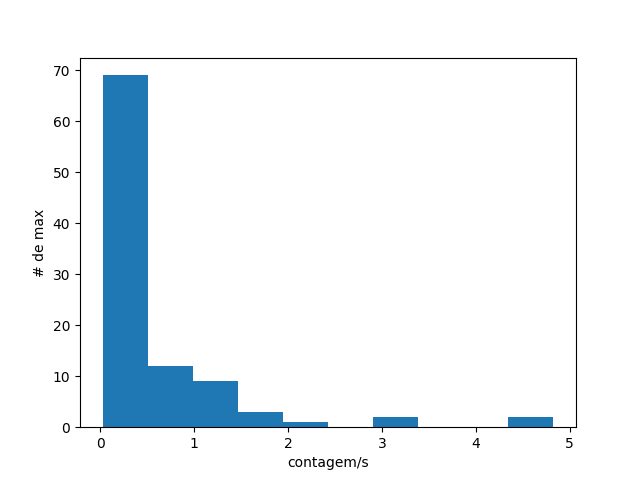

In [15]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(max_hist, bins=10)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

In [16]:
max_hist

[0.95842972551,
 0.047304109135,
 0.39488387442,
 0.051811267644,
 0.16269031359,
 0.042495958557,
 0.14348048373299999,
 0.082198896456,
 0.6032969928,
 0.257739879264,
 0.191219366,
 0.29995194,
 0.04328469673200001,
 1.2922285145,
 0.053671369834999996,
 0.48974098449,
 0.032797669815,
 0.054046423916,
 0.123001745616,
 1.33773718137,
 0.67850533108,
 0.06868316839699999,
 0.159437188944,
 0.57045621962,
 0.5168854556,
 0.14764970726999999,
 0.107086159335,
 1.0951693067600001,
 1.11532636382,
 0.041259953987999996,
 0.227422019718,
 0.66388978067,
 0.136241717781,
 0.160828644384,
 0.05030677353,
 0.053184806927,
 0.121959814475,
 0.299306687732,
 0.17539770200399998,
 0.158005368855,
 1.9393417897699998,
 3.00875292,
 0.78100207614,
 0.66578754032,
 0.03099465144,
 1.90348908592,
 0.081045265848,
 2.3649096643000003,
 0.11257167771,
 0.044613298821,
 1.5357564009999998,
 0.26072250908,
 0.81790014575,
 4.771827852,
 0.077721199952,
 0.24095838232,
 0.046549579880999996,
 0.1857448

In [17]:
np.mean(histograma)

0.014699842466107997

In [18]:
np.mean(histograma1)

0.008423246309960645

In [19]:
np.mean(histograma)-np.sqrt(np.var(histograma))

-0.004582257292129365

In [20]:
len(X)

98

In [21]:
import os.path

In [22]:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3000,9000,601)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

In [23]:
med = []
sec_mom = []
th_mom = []
four_mom = []

In [24]:
from scipy.stats import skew

In [25]:
save_path = '/home/joao/Documentos'

In [26]:
for i in range(0,len(X[0])):
    
    templist_0 = []
    templist = []
    #templist2 = []
    count = 0
    count_2 = 0
    for j in range(0,len(X)):
        
        if X[j][i] > 0:
            
            templist_0.append(X[j][i])
            count += 1
            
    
    if count > 5:
        
        for h in range(0, len(templist_0)):

            if np.mean(templist_0) - np.sqrt(np.var(templist_0)) < templist_0[h] < np.mean(templist_0) + np.sqrt(np.var(templist_0)):

                templist.append(templist_0[h])

                count_2 += 1
    
    if count_2 > 1:
        
        media = np.mean(templist)
        mom_2 = 0
        mom_3 = 0
        mom_4 = 0
        for k in range(0, len(templist)):

            mom_2 += (templist[k] - media)**2
            mom_3 += (templist[k] - media)**3
            mom_4 += (templist[k] - media)**4


        #variance = np.var(templist)
        med.append(media)
        sec_mom.append(mom_2/count)
        th_mom.append(mom_3/count)
        four_mom.append(mom_4/count)

    else:

        med.append(0)
        sec_mom.append(0)
        th_mom.append(0)
        four_mom.append(0)


In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [28]:
z = np.reshape(med, (601, 61))

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(y)):

    for j in range(0,len(x)):

        exp_z.append(z[i][j])
        exp_x.append(x[j])
        exp_y.append(y[i])


In [29]:
list_data = []
for j in range(0, len(y)):
    
    temp_x = []
    temp_z = []
    
    for i in range(0, len(exp_y)):

        if exp_y[i] == y[j]:

            temp_x.append([exp_x[i]])
            temp_z.append(exp_z[i])
            
    if max(temp_z) != 0:
        
        factor = max(temp_z)

        kernel = factor*(RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

        gp = GaussianProcessRegressor(kernel = kernel, alpha=0.0).fit(temp_x, temp_z)        
        y_mean = gp.predict(x[:, np.newaxis])     

        list_data.append(y_mean)
        
    else:
        kernel = 0.5*(RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

        gp = GaussianProcessRegressor(kernel = kernel, alpha=0.0).fit(temp_x, temp_z)        
        y_mean = gp.predict(x[:, np.newaxis])     
        
        list_data.append(y_mean)

In [30]:
factor

0.02910826248668667

In [31]:
max(temp_z)

0.02910826248668667

In [32]:
temp_x = []
temp_y = []
temp_z = []

for i in range(0, len(x)):
    
    for j in range(0, len(y)):
        
        temp_x.append(x[i])
        temp_y.append(y[j])
        temp_z.append(list_data[j][i])

In [33]:
temp_z = temp_z/max(temp_z)

In [34]:
table = []
for l in range(0,len(temp_x)):
    table.append((temp_x[l],temp_y[l],temp_z[l]))


completeName = os.path.join(save_path, "med.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()

In [35]:
z = np.reshape(sec_mom, (601, 61))

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(y)):

    for j in range(0,len(x)):

        exp_z.append(z[i][j])
        exp_x.append(x[j])
        exp_y.append(y[i])


In [36]:
list_data = []
for j in range(0, len(y)):
    
    temp_x = []
    temp_z = []
    
    for i in range(0, len(exp_y)):

        if exp_y[i] == y[j]:

            temp_x.append([exp_x[i]])
            temp_z.append(exp_z[i])
            
    if max(temp_z) != 0:
        
        factor = max(temp_z)

        kernel = factor*(RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

        gp = GaussianProcessRegressor(kernel = kernel, alpha=0.0).fit(temp_x, temp_z)        
        y_mean = gp.predict(x[:, np.newaxis])     

        list_data.append(y_mean)
        
    else:
        
        kernel = 0.5*(RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

        gp = GaussianProcessRegressor(kernel = kernel, alpha=0.0).fit(temp_x, temp_z)        
        y_mean = gp.predict(x[:, np.newaxis])     
        
        list_data.append(y_mean)

In [37]:
temp_x = []
temp_y = []
temp_z = []

for i in range(0, len(x)):
    
    for j in range(0, len(y)):
        
        temp_x.append(x[i])
        temp_y.append(y[j])
        temp_z.append(list_data[j][i])

In [38]:
temp_z = temp_z/max(temp_z)

In [39]:
table = []
for l in range(0,len(temp_x)):
    table.append((temp_x[l],temp_y[l],temp_z[l]))


completeName = os.path.join(save_path, "sec_mom.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()

In [40]:
z = np.reshape(th_mom, (601, 61))

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(y)):

    for j in range(0,len(x)):

        exp_z.append(z[i][j])
        exp_x.append(x[j])
        exp_y.append(y[i])


In [41]:
list_data = []
for j in range(0, len(y)):
    
    temp_x = []
    temp_z = []
    
    for i in range(0, len(exp_y)):

        if exp_y[i] == y[j]:

            temp_x.append([exp_x[i]])
            temp_z.append(exp_z[i])
            
    if max(temp_z) != 0:
        
        factor = max(temp_z)

        kernel = factor*(RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

        gp = GaussianProcessRegressor(kernel = kernel, alpha=0.0).fit(temp_x, temp_z)        
        y_mean = gp.predict(x[:, np.newaxis])     

        list_data.append(y_mean)
        
    else:
        kernel = 0.5*(RBF(length_scale=5, length_scale_bounds=(1, 10)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)))

        gp = GaussianProcessRegressor(kernel = kernel, alpha=0.0).fit(temp_x, temp_z)        
        y_mean = gp.predict(x[:, np.newaxis])     
        
        list_data.append(y_mean)

/home/joao/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [42]:
temp_x = []
temp_y = []
temp_z = []

for i in range(0, len(x)):
    
    for j in range(0, len(y)):
        
        temp_x.append(x[i])
        temp_y.append(y[j])
        temp_z.append(list_data[j][i])

In [43]:
temp_z = temp_z/max(temp_z)

In [44]:
table = []
for l in range(0,len(temp_x)):
    table.append((temp_x[l],temp_y[l],temp_z[l]))


completeName = os.path.join(save_path, "th_mom.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()